## Hands-on - Unsupervised learning

### Task 1

In [4]:
# Step 1: Loading required packages

!pip install mglearn
%matplotlib inline
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import mglearn

In [37]:
df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=';')

df_red['type'] = 0
df_white['type'] = 1

df_allwine = pd.concat([df_red, df_white])

# Here we turn into numpy arrays
Xw = df_allwine.iloc[:,:10].values  # dataset
yw_bin = df_allwine['type'].values   # target classification
yw_reg = df_allwine['alcohol'].values   # target regression
yw_mul = df_allwine['quality'].values   # multiclass regression

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xw, yw_mul,random_state=0)

svm = SVC()
# Train the SVM model 
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

# scoring on the scaled test set and print it
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the unscaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Test set accuracy: 0.43
Scaled test set accuracy: 0.54
SVM test accuracy: 0.55


In [12]:
# The same for linear regression

from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(Xw, yw_mul,random_state=0)

lr = LinearRegression().fit(X_train, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(lr.score(X_test, y_test)))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("linear regression Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Scaled test set accuracy: 0.25
Training set score: 0.27
linear regression Test set score: 0.25


### Task 2

Text(0, 0.5, 'Feature 1')

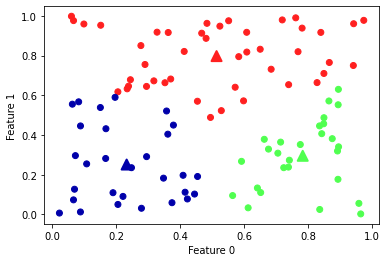

In [87]:
# Run kMeans with 3 clusters on Xw
#Start 

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=3, random_state=0).fit(Xw)
y_pred = kmeans.predict(Xw)
plt.scatter(Xw[:, 0], Xw[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
 
#END
#assignments = kmeans.labels_plt.scatter(Xw[:, 0], Xw[:, 1], c=assignments)
#mglearn.discrete_scatter(Xw[:, 0], Xw[:, 1], assignments, ax=axes[0])


In [100]:
# First preprocessing by PCA

Xw = df_allwine.iloc[:,:10].values 
scaler = StandardScaler()
scaler.fit(Xw)
X_scaled = scaler.transform(Xw)

from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=3)
# fit PCA model to breast Xw
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

#Run the kMeans and plot the result

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

def get_kmeans_figs():
    X, y = make_blobs(random_state=1)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(Xw)
    assignments = kmeans.labels_
    mglearn.discrete_scatter(Xw[:, 0], Xw[:, 1], assignments, ax=axes[0])

Original shape: (6497, 10)
Reduced shape: (6497, 3)


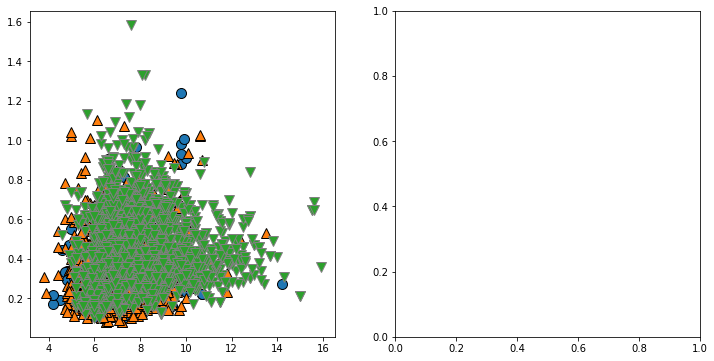

In [101]:
get_kmeans_figs()